In [ ]:
from nnsight import CONFIG

if CONFIG.API.APIKEY is None:
    CONFIG.set_default_api_key(input("Enter API key: "))
CONFIG.APP.REMOTE_LOGGING = False

/share/u/adam/miniconda3/envs/nns/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

from utils import load_model

model = load_model(input("Enter model key: ") or "openai-community/gpt2-xl")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading model openai-community/gpt2-xl | Remote Execution Mode


Provide a source and target prompt

In [3]:
from utils import tokenize_prompt
from predict import get_next_prediction

source_prompt = input("Enter source prompt: ") or "Megan Rapinoe plays the sport of"
source_tokens = tokenize_prompt(source_prompt, model, show=True, title="Source Prompt Tokens")
source_prediction_id = get_next_prediction(
    source_prompt, model, show=True
)

target_prompt = input("Enter target prompt: ") or "Shaquille O'Neal plays the sport of"
target_tokens = tokenize_prompt(target_prompt, model, show=True, title="Target Prompt Tokens")
target_prediction_id = get_next_prediction(
    target_prompt, model, show=True
)

                    Source Prompt Tokens                    
┌────┬─────┬──────┬────┬────┬────────┬──────┬────────┬─────┐
│ Me │ gan │  Rap │ in │ oe │  plays │  the │  sport │  of │
│ 0  │ 1   │ 2    │ 3  │ 4  │ 5      │ 6    │ 7      │ 8   │
└────┴─────┴──────┴────┴────┴────────┴──────┴────────┴─────┘

Next Prediction:  soccer | Probability: 0.7675139904022217


                       Target Prompt Tokens                       
┌────┬─────┬──────┬────┬───┬──────┬────────┬──────┬────────┬─────┐
│ Sh │ aqu │ ille │  O │ ' │ Neal │  plays │  the │  sport │  of │
│ 0  │ 1   │ 2    │ 3  │ 4 │ 5    │ 6      │ 7    │ 8      │ 9   │
└────┴─────┴──────┴────┴───┴──────┴────────┴──────┴────────┴─────┘

Next Prediction:  basketball | Probability: 0.546403169631958


Select a source and target patch position

In [4]:
from utils import show_patch_pattern

source_patch = int(input("Enter source patch position: ") or "4")
show_patch_pattern(source_patch, source_tokens, "Source Prompt Tokens")


target_patch = int(input("Enter target patch position: ") or "5")
show_patch_pattern(target_patch, target_tokens, "Target Prompt Tokens")

                    Source Prompt Tokens                    
┌────┬─────┬──────┬────┬────┬────────┬──────┬────────┬─────┐
│ Me │ gan │  Rap │ in │ oe │  plays │  the │  sport │  of │
│ 0  │ 1   │ 2    │ 3  │ 4  │ 5      │ 6    │ 7      │ 8   │
└────┴─────┴──────┴────┴────┴────────┴──────┴────────┴─────┘

                       Target Prompt Tokens                       
┌────┬─────┬──────┬────┬───┬──────┬────────┬──────┬────────┬─────┐
│ Sh │ aqu │ ille │  O │ ' │ Neal │  plays │  the │  sport │  of │
│ 0  │ 1   │ 2    │ 3  │ 4 │ 5    │ 6      │ 7    │ 8      │ 9   │
└────┴─────┴──────┴────┴───┴──────┴────────┴──────┴────────┴─────┘

Run activation patching

In [5]:
from activation_patching import activation_patching

result = activation_patching(source_prompt, target_prompt, source_patch, target_patch, model)

You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Visualize results

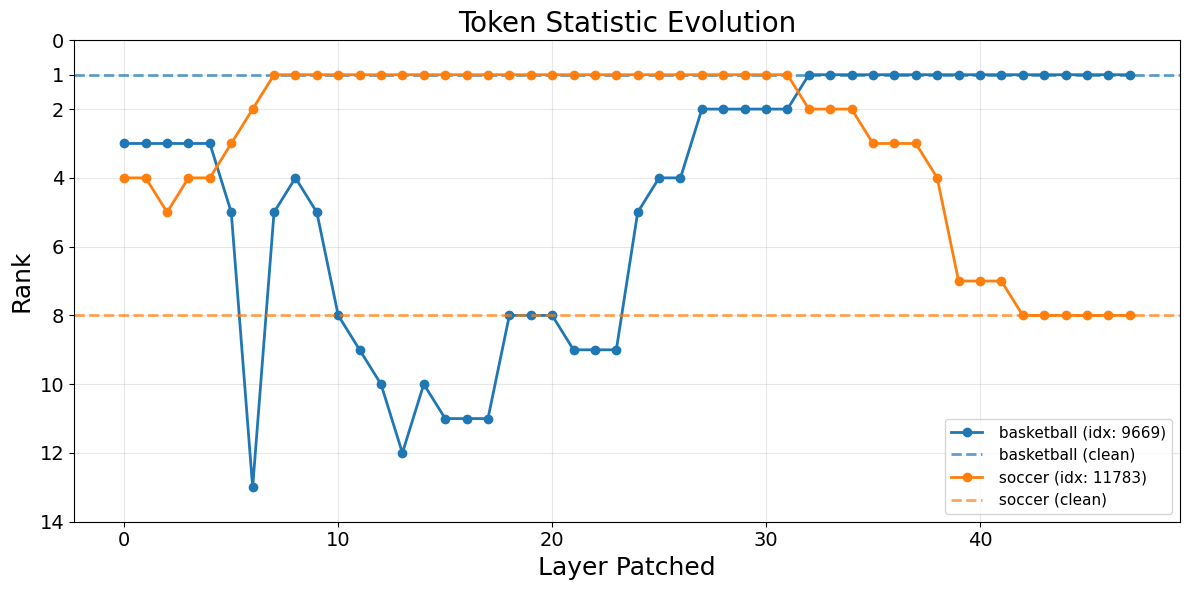

In [6]:
from visualize import plot_token_metrics_line, AP_Metric

plot_token_metrics_line(
    *result, 
    model.tokenizer, 
    metric=AP_Metric.RANK, 
    token_ids=[model.tokenizer.encode(" basketball")[0], model.tokenizer.encode(" soccer")[0]]
)

Select tokens to investigate

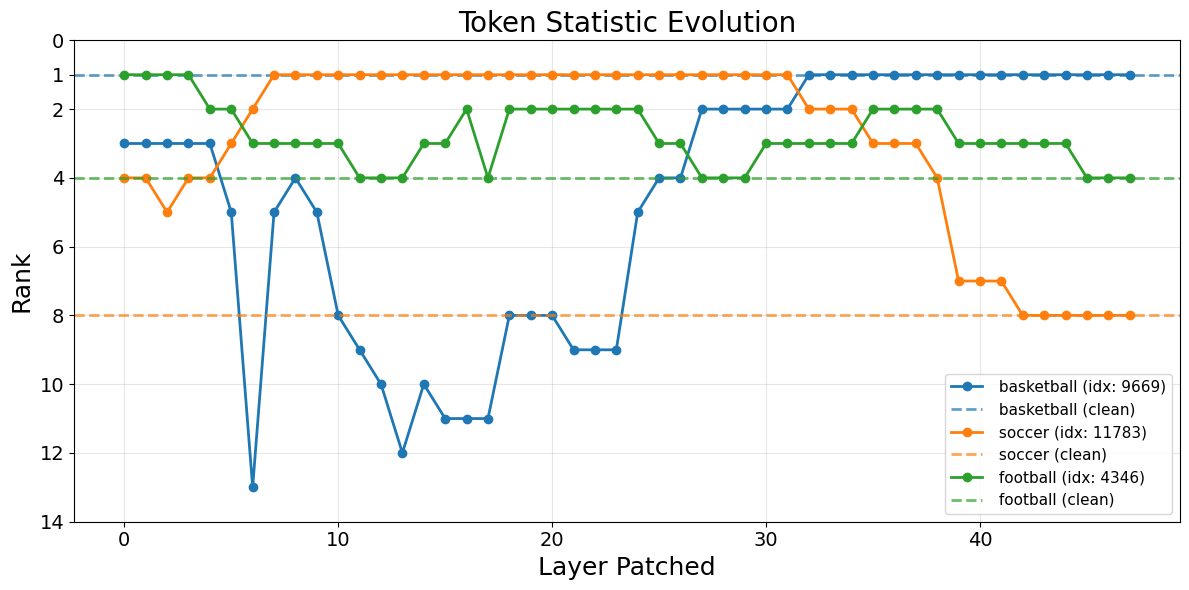

In [9]:
from utils import get_token_id

plot_token_metrics_line(
    *result, 
    model.tokenizer, 
    metric=AP_Metric.RANK, 
    token_ids=[
        get_token_id(" basketball", model), 
        get_token_id(" soccer", model), 
        get_token_id(input("Enter token string: ") or " football", model)
    ]
)

Plot probability

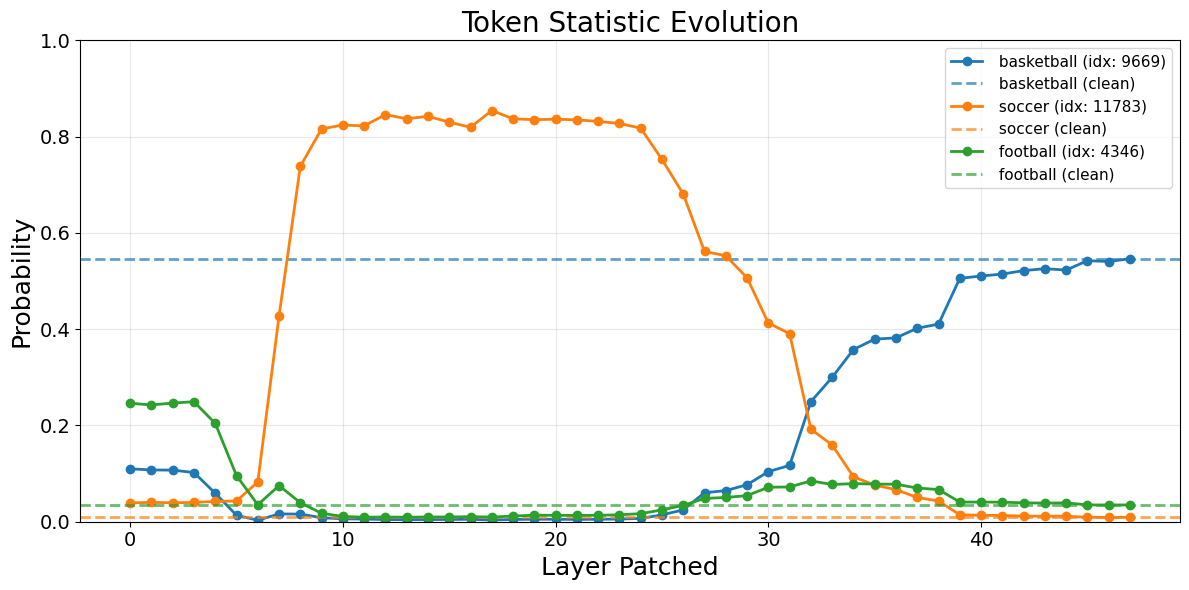

In [ ]:
plot_token_metrics_line(
    *result, 
    model.tokenizer, 
    metric=AP_Metric.PROBABILITY,
    token_ids=[
        get_token_id(" basketball", model), 
        get_token_id(" soccer", model), 
        get_token_id(input("Enter token string: ") or " football", model)
    ]
)